# Load Package

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from pykin.utils import plot_utils as p_utils
%matplotlib inline

In [115]:
def linearplot_with_confidence(x_list, error_list, label, marker="", color='r'):
    mean_list = np.mean(error_list,axis=0)
    std_list = np.mean(error_list,axis=0)
    a = 0.25
    plt.fill_between(x_list, mean_list-a*std_list,mean_list+a*std_list, alpha=0.13, color=color)
    plt.plot(x_list,mean_list,label=label,marker=marker, ms=11, c=color, markevery=10)

# Unit Plot

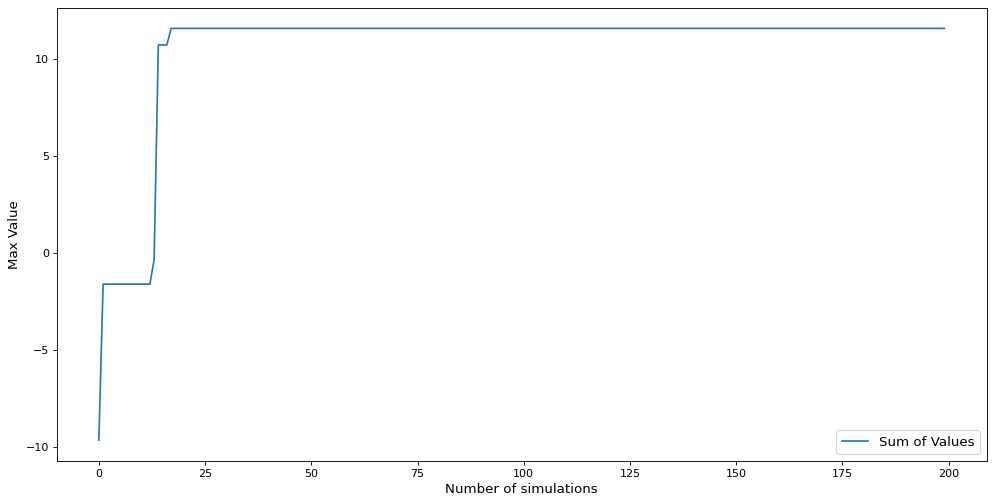

In [116]:
seed=3
budgets = 200
end_num = 0
algo = "bai_perturb"
filename = f'benchmark1_result/benchmark1_test_algo({algo})_budget({budgets})_seed({seed})_{end_num}.npy'

perturb_final_level_1_values = []
perturb_final_level_2_values = []
perturb_final_pnp_all_joint_paths = []

with open(filename,'rb') as f:
    data_for_seed = np.load(f, allow_pickle=True)
    perturb_final_level_1_values.append(data_for_seed['level_1_values'])
    perturb_final_level_2_values.append(data_for_seed['level_2_values'])
    perturb_final_pnp_all_joint_paths.append(data_for_seed['pnp_all_joint_paths'])

# mean_level_1_values = np.mean(final_level_1_values[0], axis=0)
fig, ax = p_utils.init_2d_figure("test")
p_utils.plot_values(
    ax,
    perturb_final_level_1_values[0][2], 
    label="Sum of Values", 
    title="Benchamrk1_Level_1", 
    save_dir_name='benchmark1_result', 
    is_save=False)

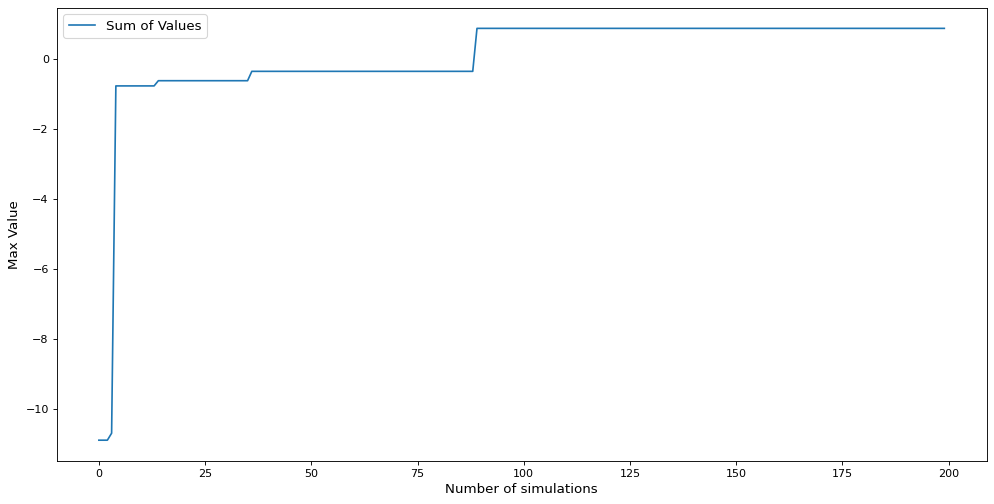

In [117]:
seed=3
budgets = 200
end_num = 0
algo = "uct"
filename = f'benchmark1_result/benchmark1_test_algo({algo})_budget({budgets})_seed({seed})_{end_num}.npy'
uct_final_level_1_values = []
uct_final_level_2_values = []
uct_final_pnp_all_joint_paths = []

with open(filename,'rb') as f:
    data_for_seed = np.load(f, allow_pickle=True)
    uct_final_level_1_values.append(data_for_seed['level_1_values'])
    uct_final_level_2_values.append(data_for_seed['level_2_values'])
    uct_final_pnp_all_joint_paths.append(data_for_seed['pnp_all_joint_paths'])

# mean_level_1_values = np.mean(final_level_1_values[0], axis=0)
fig, ax = p_utils.init_2d_figure("test")
p_utils.plot_values(
    ax,
    uct_final_level_1_values[0][2], 
    label="Sum of Values", 
    title="Benchamrk1_Level_1", 
    save_dir_name='benchmark1_result', 
    is_save=False)

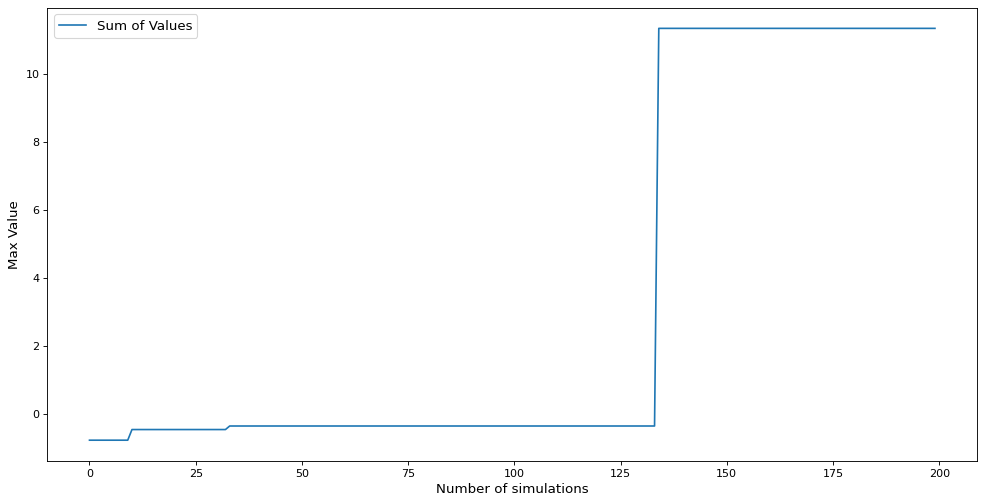

In [118]:
seed=3
budgets = 200
end_num = 0
algo = "random"
filename = f'benchmark1_result/benchmark1_test_algo({algo})_budget({budgets})_seed({seed})_{end_num}.npy'
random_final_level_1_values = []
random_final_level_2_values = []
random_final_pnp_all_joint_paths = []

with open(filename,'rb') as f:
    data_for_seed = np.load(f, allow_pickle=True)
    random_final_level_1_values.append(data_for_seed['level_1_values'])
    random_final_level_2_values.append(data_for_seed['level_2_values'])
    random_final_pnp_all_joint_paths.append(data_for_seed['pnp_all_joint_paths'])

# mean_level_1_values = np.mean(final_level_1_values[0], axis=0)
fig, ax = p_utils.init_2d_figure("test")
p_utils.plot_values(
    ax,
    random_final_level_1_values[0][2], 
    label="Sum of Values", 
    title="Benchamrk1_Level_1", 
    save_dir_name='benchmark1_result', 
    is_save=False)

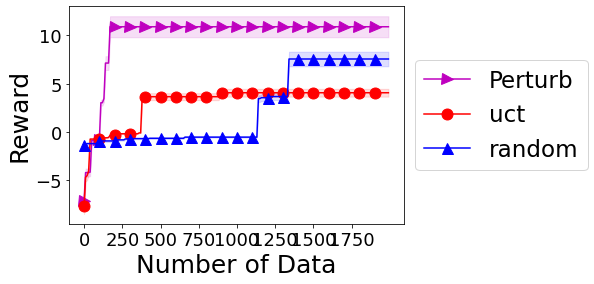

In [127]:
x_list = 10*np.arange(len(perturb_final_level_1_values[0][0]))
linearplot_with_confidence(x_list, perturb_final_level_1_values[0], "Perturb", ">", "m")
linearplot_with_confidence(x_list, uct_final_level_1_values[0], "uct","o", "r")
linearplot_with_confidence(x_list, random_final_level_1_values[0], "random","^", "b")
plt.xlabel("Number of Data",fontsize=25)
plt.ylabel("Reward",fontsize=25)

plt.xticks(x_list[::25],x_list[::25],fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 23})
plt.show()

# Load Result Data

In [131]:
n_seeds=3
budgets = 200
end_num = 0

algos = ["bai_perturb", "uct", "random"]
final_level_1_values = [[] for _ in range(len(algos))]
final_level_2_values = [[] for _ in range(len(algos))]
final_pnp_all_joint_paths = [[] for _ in range(len(algos))]
for idx, algo in enumerate(algos):
    for seed in range(1, n_seeds+1):
        filename = 'benchmark1_result/benchmark1_test_algo({:})_budget({:})_seed({:})_{}.npy'.format(algo, budgets, seed, end_num)
        try:
            with open(filename,'rb') as f:
                data_for_seed = np.load(f, allow_pickle=True)
                final_level_1_values[idx].append(data_for_seed['level_1_values'])
                final_level_2_values[idx].append(data_for_seed['level_2_values'])
                final_pnp_all_joint_paths[idx].append(data_for_seed['pnp_all_joint_paths'])
        except FileNotFoundError as e:
            print(e)


In [121]:
def linearplot_with_confidence(x_list, error_list, label, marker="", color='r'):
    mean_list = np.mean(error_list,axis=0)
    std_list = np.mean(error_list,axis=0)
    a = 0.1
    plt.fill_between(x_list, mean_list-a*std_list,mean_list+a*std_list, alpha=0.13, color=color)
    plt.plot(x_list,mean_list,label=label,marker=marker, ms=11, c=color, markevery=10)

# Plot Results

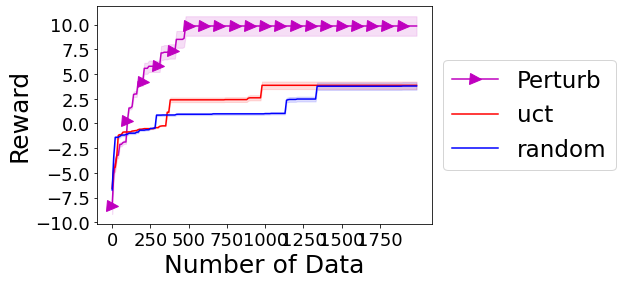

In [132]:

test = [[] for _ in range(len(algos))]
for idx, algo in enumerate(algos):
    for i in range(3):
        test[idx].append(np.mean(final_level_1_values[idx][i], axis=0))

# result = np.mean(test, axis=0)
x_list = 10*np.arange(len(test[0][0]))
linearplot_with_confidence(x_list, test[0], "Perturb", ">", "m")
linearplot_with_confidence(x_list, test[1], "uct","", "r")
linearplot_with_confidence(x_list, test[2], "random","", "b")
plt.xlabel("Number of Data",fontsize=25)
plt.ylabel("Reward",fontsize=25)

plt.xticks(x_list[::25],x_list[::25],fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 23})
plt.show()